In [3]:
%matplotlib inline

import os

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import linear_model, datasets
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

# Import Keras libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical

In [4]:
dataset = pd.read_csv('employees.csv')
dataset.head()

,job_satisfaction,age,in_service
0,7.3,24,1
1,6.8,53,1
2,5.9,31,0
3,8.8,31,1
4,5.6,20,0


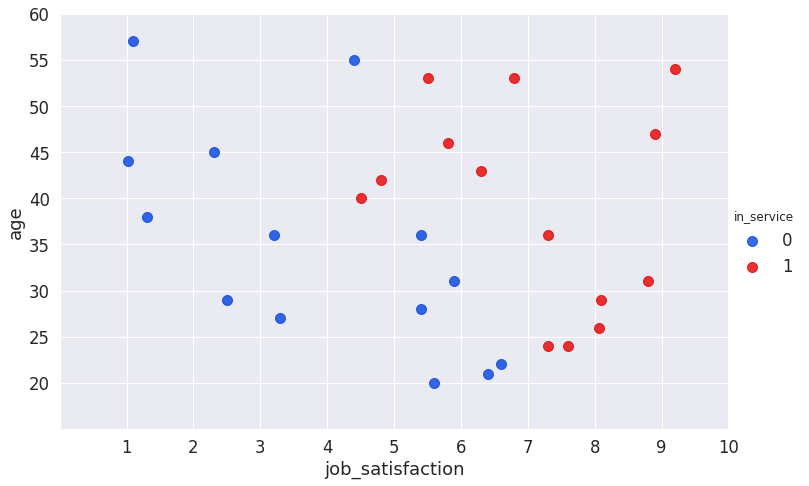

In [5]:
sns.set(font_scale = 1.5) # font size of the axis labels
colors = ['blue', 'red', 'greyish', 'faded green', 'dusty purple']
g = sns.lmplot(x='job_satisfaction',y='age',data=dataset,fit_reg=False,hue='in_service',palette =sns.xkcd_palette(colors),
           scatter_kws={'s':100}, height=7, aspect=1.5)
g.set(xlim=(0, 10), ylim=(15, 60),xticks=[1, 2,3,4,5,6,7,8,9,10], yticks=[20, 25, 30,35,40,45,50,55,60 ])


In [6]:
y = dataset.in_service.values
X = dataset.drop(['in_service'],axis=1)


In [7]:
logreg = linear_model.LogisticRegression(C=1e5) # C= Inverse of regularization strength;                                                # must be a positive float. Like in support vector machines,
                                                # smaller values specify stronger regularization.
logreg.fit(X, y)

print('coefficiënten: ',logreg.coef_)
print('intercept:',logreg.intercept_)

coefficiënten:  [[2.15872616 0.20303943]]
intercept: [-19.51126249]


<ipython-input-8-52f6123cdffa>:20: UserWarning: No contour levels were found within the data range.
  plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5)


<Figure size 1152x648 with 0 Axes>

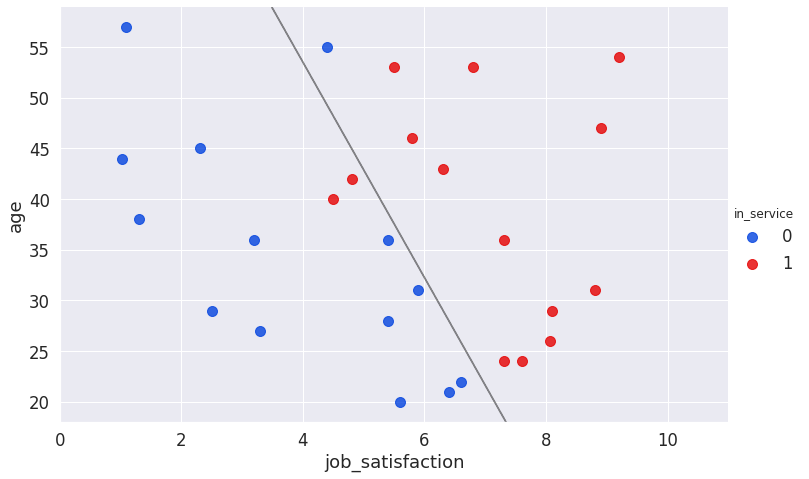

In [8]:
fig = plt.figure(figsize=(16,9))

X = np.asarray(X)

h = 0.01
job_satisfaction_min = X[:,0].min()-2
job_satisfaction_max = X[:,0].max()+2
age_min = X[:,1].min()-2
age_max = X[:,1].max()+2
xx, yy = np.meshgrid(np.arange(job_satisfaction_min, job_satisfaction_max, h),np.arange(age_min, age_max, h))

xy = np.vstack([xx.ravel(), yy.ravel()]).T
Z = logreg.predict(xy).reshape(xx.shape)

sns.set(font_scale = 1.5)
colors = ['blue', 'red', 'greyish', 'faded green', 'dusty purple']
sns.lmplot(x='job_satisfaction',y='age',data=dataset,fit_reg=False,hue='in_service',palette =sns.xkcd_palette(colors),scatter_kws={'s':100}, height=7, aspect=1.5)
#plt.ylim(0, 11)
plt.xlim(0, 11)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5)


## Higher order features

In [9]:
# creation of higher order features
graad = 3

poly = PolynomialFeatures(graad)
Xp = poly.fit_transform(X)

# Train model 

logreg_poly = linear_model.LogisticRegression(C=1)
logreg_poly.fit(Xp, y)

/home/gevaertw/tensorflow2/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<ipython-input-10-b28ebf7ca3fd>:24: UserWarning: No contour levels were found within the data range.
  plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5)


<Figure size 1152x648 with 0 Axes>

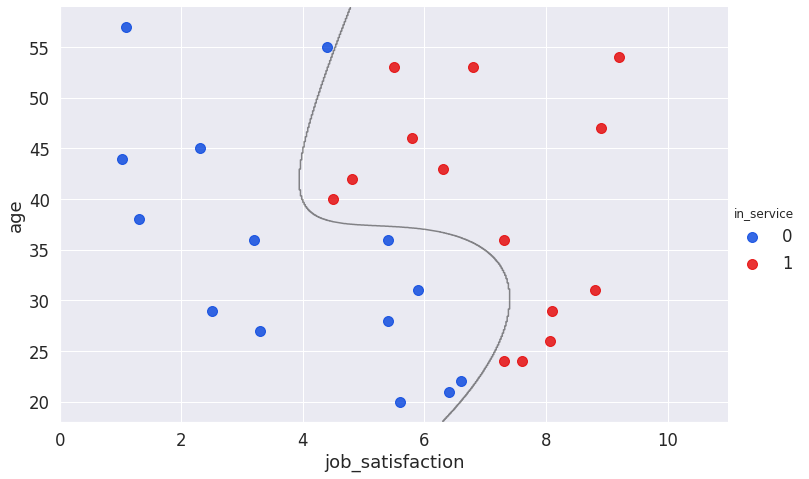

In [10]:
fig = plt.figure(figsize=(16,9))

Xp = np.asarray(X)

h = 0.02
job_satisfaction_min = Xp[:,0].min()-2
job_satisfaction_max = Xp[:,0].max()+2
age_min = Xp[:,1].min()-2
age_max = Xp[:,1].max()+2
xx, yy = np.meshgrid(np.arange(job_satisfaction_min, job_satisfaction_max, h),np.arange(age_min, age_max, h))

xy = np.vstack([xx.ravel(), yy.ravel()]).T

xy_p = poly.fit_transform(xy)


Z = logreg_poly.predict(xy_p).reshape(xx.shape)


sns.set(font_scale = 1.5)
colors = ['blue', 'red', 'greyish', 'faded green', 'dusty purple']
sns.lmplot(x='job_satisfaction',y='age',data=dataset,fit_reg=False,hue='in_service',palette =sns.xkcd_palette(colors),scatter_kws={'s':100}, height=7, aspect=1.5)
plt.xlim(0, 11)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5)



Z = logreg.predict(xy)


## Neural network

In [11]:
# data normalization via standard scaler

scaler = StandardScaler()

scaler.fit(X)
Xs = scaler.transform(X)

In [14]:
# Initialize the neural network

input_dim = Xs.shape[1]

model = Sequential()
model.add(Dense(5, input_dim=input_dim, kernel_initializer='RandomUniform',activation='tanh'))
model.add(Dense(5, kernel_initializer='RandomUniform',activation='tanh'))
model.add(Dense(5, kernel_initializer='RandomUniform',activation='tanh'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

#SGD = keras.optimizers.SGD(lr=1, momentum=0.0, decay=0.0, nesterov=False)
adam = tf.keras.optimizers.Adam(lr=0.05)


model.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=adam,metrics=['accuracy'])

# train the model

history = model.fit(Xs, y, epochs=300, verbose=1,validation_split=0.0)

Epoch 1/300
1/1 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2/300
1/1 [==============================] - 0s 606us/step - loss: 0.6920 - accuracy: 0.8214
Epoch 3/300
1/1 [==============================] - 0s 610us/step - loss: 0.6845 - accuracy: 0.5000
Epoch 4/300
1/1 [==============================] - 0s 492us/step - loss: 0.6663 - accuracy: 0.6071
Epoch 5/300
1/1 [==============================] - 0s 503us/step - loss: 0.6283 - accuracy: 0.7857
Epoch 6/300
1/1 [==============================] - 0s 478us/step - loss: 0.5656 - accuracy: 0.8929
Epoch 7/300
1/1 [==============================] - 0s 470us/step - loss: 0.4823 - accuracy: 0.8571
Epoch 8/300
1/1 [==============================] - 0s 477us/step - loss: 0.3985 - accuracy: 0.8571
Epoch 9/300
1/1 [==============================] - 0s 516us/step - loss: 0.3188 - accuracy: 0.9286
Epoch 10/300
1/1 [==============================] - 0s 654us/step - loss: 0.2803 - accuracy: 0.8571
Epoch 11/30

In [15]:
yp = model.predict_classes(Xs)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


<ipython-input-16-5f333697c13b>:24: UserWarning: No contour levels were found within the data range.
  plt.contour(xx, yy, Zn, colors='k', levels=[-1, 0, 1], alpha=0.5)


<Figure size 1152x648 with 0 Axes>

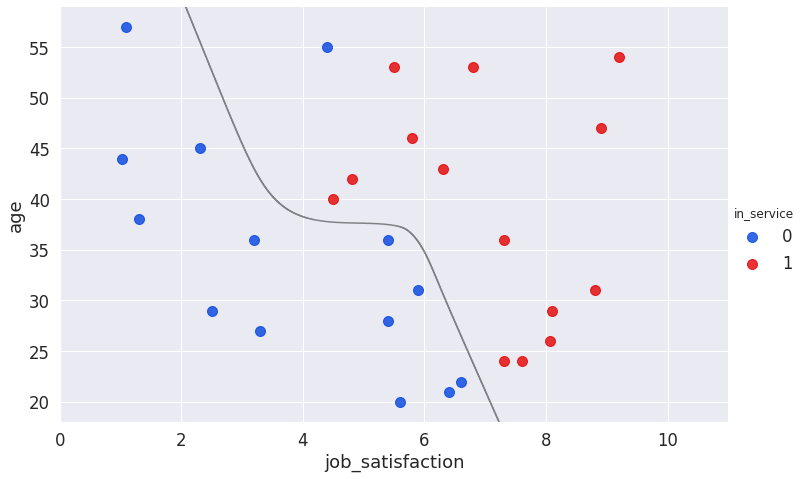

In [16]:
fig = plt.figure(figsize=(16,9))

X = np.asarray(X)

h = 0.01
job_satisfaction_min = X[:,0].min()-2
job_satisfaction_max = X[:,0].max()+2
age_min = X[:,1].min()-2
age_max = X[:,1].max()+2
xx, yy = np.meshgrid(np.arange(job_satisfaction_min, job_satisfaction_max, h),np.arange(age_min, age_max, h))

xy = np.vstack([xx.ravel(), yy.ravel()]).T

xys = scaler.transform(xy)

Zn = model.predict_classes(xys).reshape(xx.shape)



sns.set(font_scale = 1.5)
colors = ['blue', 'red', 'greyish', 'faded green', 'dusty purple']
sns.lmplot(x='job_satisfaction',y='age',data=dataset,fit_reg=False,hue='in_service',palette =sns.xkcd_palette(colors),scatter_kws={'s':100}, height=7, aspect=1.5)
plt.xlim(0, 11)
plt.contour(xx, yy, Zn, colors='k', levels=[-1, 0, 1], alpha=0.5)
